<a href="https://colab.research.google.com/github/budur1/ML-projects/blob/main/seattle_biker_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Predict number of bikers on a given day using linear regression

You are provided with a dataset about Seattle's Fremont Bridge in the form of a csv file.
The data contains different details about a given day, like weather, temperature and other factors (see the dataframe preview below) for more details. The data also contains how many bikers were observed crossing the brudge that day.

You are provided with the code to download and load the csv file.

Your task is to train a linear regression model which takes in the parameters of the day (you can drop the columns that you think you don't need) and predicts the number of bikers according to those parameters.

In [ ]:
from IPython.display import clear_output

In [ ]:
# Don't modify this code


%pip install gdown==4.5


clear_output()

In [ ]:
# Download the CSV file.
!gdown 1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD

Downloading...
From: https://drive.google.com/uc?id=1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD
To: /content/bikers_data.csv
100% 213k/213k [00:00<00:00, 70.6MB/s]


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# read data
data_df = pd.read_csv('bikers_data.csv')

# DATA Pre preocessing

In [ ]:
data_df.head()

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_df = data_df.drop(columns=['Date'])

data_df.head()

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number of bikers  2646 non-null   float64
 1   Mon               2646 non-null   float64
 2   Tue               2646 non-null   float64
 3   Wed               2646 non-null   float64
 4   Thu               2646 non-null   float64
 5   Fri               2646 non-null   float64
 6   Sat               2646 non-null   float64
 7   Sun               2646 non-null   float64
 8   holiday           2646 non-null   float64
 9   daylight_hrs      2646 non-null   float64
 10  Rainfall (in)     2646 non-null   float64
 11  Temp (F)          2646 non-null   float64
 12  dry day           2646 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 268.9 KB


In [ ]:
data_y = data_df['Number of bikers'] # target
data_x = data_df.drop(['Number of bikers'], axis=1) # input features

In [ ]:
data_x.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
len(data_y)

2646

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, shuffle=True)

# print("Training features shape:", X_train.shape)
# print("Testing features shape:", X_test.shape)
# print("Training target shape:", y_train.shape)
# print("Testing target shape:", y_test.shape)

'''

we can use this approch or use the (Time Series Split cross-validation) as we used belew which is more suitable for this case ..

'''

Training features shape: (2116, 12)
Testing features shape: (530, 12)
Training target shape: (2116,)
Testing target shape: (530,)


In [ ]:
print(data_x.dtypes)


In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Perform Time Series Split cross-validation
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = cross_val_score(model, data_x, data_y, cv=tscv, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores = -mse_scores

# Calculate mean MSE score
mean_mse = mse_scores.mean()
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_mse))
print("Mean Squared Error (Time Series Split cross-validation):", mean_mse)


Root Mean Squared Error (RMSE): 2377.8222400180107
Mean Squared Error (Time Series Split cross-validation): 5654038.605124271


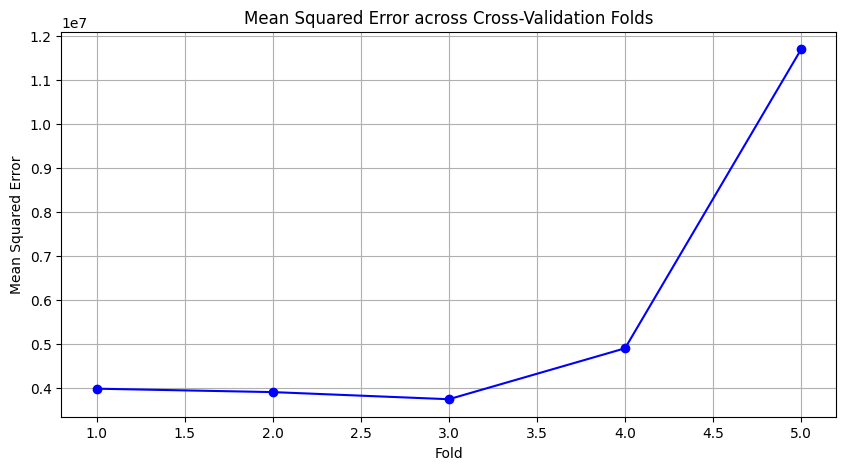

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error across Cross-Validation Folds')
plt.grid(True)
plt.show()